In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
#df = pd.read_csv(".\\Data_USD.csv", header=None,skiprows=1)
df = pd.read_csv(".\\Data_USD.csv")
#df.head().to_csv(".\\test.csv")

In [3]:
#T=df.groupby("SEX") 

In [4]:
#T.describe()

In [5]:
df.tail()

,LIMIT_BAL_US,SEX,EDUCATION,MARRIAGE,AGE,PAY_SCORE_AVG,BILL_AVG_US,PAY_AMT_AVG_US,PAY_TO_BILL,CREDIT_UTILIZATION,DEFAULT_PAYMENT_NEXT_MO
29995,7982.857143,1,3,1,39,0.00,4386.634429,257.326190,0.06,0.858855,0
29996,5442.857143,1,3,2,43,-0.67,128.100667,87.630000,0.68,0.011220,0
29997,1088.571429,1,2,2,37,1.33,426.332952,189.290476,0.44,0.118833,1
29998,2902.857143,1,3,1,41,-0.17,1612.361762,890.094619,0.55,-0.020563,1
29999,1814.285714,1,2,1,46,0.00,1396.238000,50.243619,0.04,0.958580,1


In [6]:
# X = df.drop('Y_Value',axis =1).values
# y = df['Y_Value'].values
X = df.drop('DEFAULT_PAYMENT_NEXT_MO',axis =1).values
X[2999,0]

1814.285714

In [7]:
X.shape

(30000, 10)

In [8]:
y = df['DEFAULT_PAYMENT_NEXT_MO'].values
#y.reshape(-1,1)

In [9]:
#print(X.shape)
X.shape

(30000, 10)

In [10]:
#print(y.shape)
y.shape

(30000,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.3, random_state=42)

In [12]:
y_test.T

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
X_test.shape

(9000, 10)

In [14]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [15]:
X_scaler

StandardScaler()

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
X_train_scaled

array([[ 0.56391448,  0.80648893, -1.07681763, ..., -0.49741723,
         0.09035743, -1.02549459],
       [-0.90610925,  0.80648893, -1.07681763, ..., -0.13590122,
         0.08737206, -0.85894506],
       [-0.90610925,  0.80648893,  0.18648797, ..., -0.33785543,
        -0.05294013,  1.2179713 ],
       ...,
       [-0.90610925, -1.23994262, -1.07681763, ..., -0.49741723,
         0.09035743, -1.02549459],
       [-0.75136991,  0.80648893,  0.18648797, ..., -0.31133477,
        -0.05294013,  1.53895893],
       [-0.05504288,  0.80648893,  0.18648797, ..., -0.11985747,
         0.10229889, -1.02579807]])

In [18]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [19]:
from keras.models import Sequential

#instantiate
model = Sequential()

In [20]:
from keras.layers import Dense

number_inputs = 10
number_hidden = 25 # Best model 30

model.add(Dense(units = number_hidden, activation ='relu', input_dim=number_inputs))
model.add(Dense(units = 35, activation ='relu')) #second hidden layer
model.add(Dense(units = 25, activation ='relu')) #second hidden layer
model.add(Dense(units = 15, activation ='relu')) #second hidden layer
model.add(Dense(units = 10, activation ='relu')) #third hidden layer
model.add(Dense(units = 7, activation ='relu')) #third hidden layer
model.add(Dense(units = 5, activation ='relu')) #third hidden layer

In [21]:
number_classes =2 ## yes or no
model.add(Dense(units = number_classes, activation = 'sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                275       
_________________________________________________________________
dense_2 (Dense)              (None, 35)                910       
_________________________________________________________________
dense_3 (Dense)              (None, 25)                900       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [23]:
#compile the model
model.compile(optimizer = 'sgd' ,
             loss = 'categorical_crossentropy',
             metrics =['accuracy'])

In [24]:
#train the model

model.fit(X_train_scaled, y_train_categorical, epochs=150,shuffle = True,verbose =2)

Epoch 1/150
 - 1s - loss: 0.5660 - accuracy: 0.7772
Epoch 2/150
 - 1s - loss: 0.5248 - accuracy: 0.7773
Epoch 3/150
 - 1s - loss: 0.5177 - accuracy: 0.7773
Epoch 4/150
 - 1s - loss: 0.5087 - accuracy: 0.7773
Epoch 5/150
 - 1s - loss: 0.4992 - accuracy: 0.7773
Epoch 6/150
 - 1s - loss: 0.4901 - accuracy: 0.7773
Epoch 7/150
 - 1s - loss: 0.4812 - accuracy: 0.7773
Epoch 8/150
 - 1s - loss: 0.4741 - accuracy: 0.7773
Epoch 9/150
 - 1s - loss: 0.4688 - accuracy: 0.7773
Epoch 10/150
 - 1s - loss: 0.4651 - accuracy: 0.7907
Epoch 11/150
 - 1s - loss: 0.4617 - accuracy: 0.8060
Epoch 12/150
 - 1s - loss: 0.4591 - accuracy: 0.8060
Epoch 13/150
 - 1s - loss: 0.4571 - accuracy: 0.8060
Epoch 14/150
 - 1s - loss: 0.4553 - accuracy: 0.8053
Epoch 15/150
 - 1s - loss: 0.4539 - accuracy: 0.8059
Epoch 16/150
 - 1s - loss: 0.4529 - accuracy: 0.8050
Epoch 17/150
 - 1s - loss: 0.4519 - accuracy: 0.8050
Epoch 18/150
 - 1s - loss: 0.4513 - accuracy: 0.8059
Epoch 19/150
 - 1s - loss: 0.4501 - accuracy: 0.8056
Ep

In [25]:
model.save("ccneuralnetwork.h5")

In [26]:
#quantify the model
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test_categorical,verbose =2)
print( model_loss )
print (model_accuracy)

0.4560965924263001
0.801111102104187


F1, Precision Recall, and Confusion Matrix

In [27]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [28]:
y_prediction = model.predict_classes(X_test)

In [29]:
y_prediction.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [30]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.0005102040816326531


In [31]:
print(classification_report(y_test, y_prediction,
                            target_names=["default", "non_default"]))

              precision    recall  f1-score   support

     default       0.78      1.00      0.88      7040
 non_default       0.17      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.47      0.50      0.44      9000
weighted avg       0.65      0.78      0.69      9000



In [32]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[7035    5]
 [1959    1]]
Normalized confusion matrix
[[9.99e-01 7.10e-04]
 [9.99e-01 5.10e-04]]


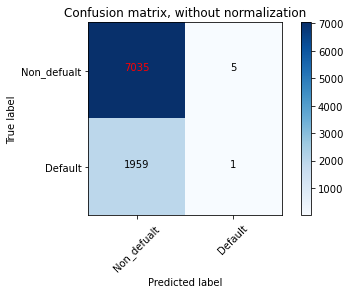

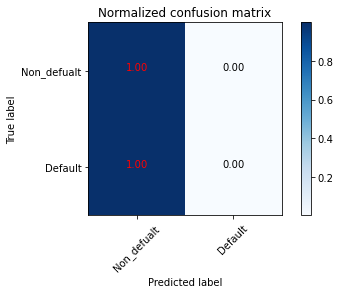

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_defualt', 'Default'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_defualt', 'Default'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()